In [18]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
import re
import os

from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/yudai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

`brief_analysis.ipynb` で得られた手法を使って様々な論文誌の論文を解析してみる

In [85]:
def loadtxt(pdf: str) -> str:
    output_string = StringIO()
    with open(pdf, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)
            break
    text = output_string.getvalue()
    return text

def clean(text: str) -> str:
    text2 = re.sub(r"\n+|,|\s+", " ", text.lower())
    text3 = re.sub(r"(\[|\()\d+((–|,|\s)\d+)?(\]|\))", "", text2)
    text4 = re.sub(r"\.|:|'|’|/|;|\*", "", text3)
    text5 = re.sub(r"\-\s", "", text4)
    text6 = re.sub(r"\s+", " ", text5)
    text7 = re.sub(r"\(|\)", "", text6)
    text_list = text7.split(" ")
    text_list2 = [word for word in text_list if word not in stopwords.words("english") and len(word) > 1]
    
    return " ".join(text_list2)

In [86]:
adv_matter = clean(loadtxt("./Samples/AdvMatter1.pdf"))
jphys = clean(loadtxt("./Samples/JPhys1.pdf"))
jpsj = clean(loadtxt("./Samples/JPSJ1.pdf"))
nat_com = clean(loadtxt("./Samples/NatCommun1.pdf"))
nat_mat = clean(loadtxt("./Samples/NatMatter1.pdf"))
nat_phys = clean(loadtxt("./Samples/NatPhys1.pdf"))
nat = clean(loadtxt("./Samples/Nature1.pdf"))
prl = clean(loadtxt("./Samples/PRL1.pdf"))
prb = clean(loadtxt("./Samples/PRB1.pdf"))

In [87]:
adv_matter

'magnetic skyrmions observation various spontaneous magnetic skyrmionic bubbles room temperature frustrated kagome magnet uniaxial magnetic anisotropy zhipeng hou weijun ren bei ding guizhou xu yue wang bing yang qiang zhang ying zhang enke liu feng xu wenhong wang guangheng wu xixiang zhang baogen shen zhidong zhang quest materials hosting topologically protected skyrmionic spin textures continues fueled promise novel devices although many materials demonstrated existence spin textures major challenges remain addressed devices based magnetic skyrmions realized example able create manipulate skyrmionic spin textures room temperature great importance technological applications adapt various external stimuli acting information carriers spintronic devices first observation skyrmionic magnetic bubbles variable topological spin textures formed room temperature frustrated kagome fe3sn2 magnet uniaxial magnetic anisotropy reported magnetization dynamics investigated using situ lorentz transmi

In [88]:
len(adv_matter.split())

427

In [89]:
jphys

'journal physics condensed matterfast track communicationthe giant anomalous hall effect ferromagnetfe3sn2—a frustrated kagome metalto cite article kida et al 2011 phys condens matter 23 112205 view article online updates enhancementsrelated contentnon-collinearity spin frustration theitinerant kagome ferromagnet fe3sn2l fenner dee wills-anomalous hall effect electrontransport ferromagnetic mnbi filmsp kharel sellmyer-skew scattering dominated anomaloushall effect coxmgo100x granular thinfilmsqiang zhang yan wen yuelei zhao et al-recent citationselemental analysis magnetism ofhydronium jarosites—model kagomeantiferromagnets topological spinglassesa wills bisson-anomalous hall effect due tononcollinearity pyrochlore compoundsrole orbital aharonov-bohm effecttomizawa takeshi kontani hirhoshi-this content downloaded ip address 1578219415 09102019 0406'

In [90]:
len(jphys.split())

91

In [91]:
jpsj

'journal physical society japan vol 71 11 november 2002 pp 2613–2616 #2002 physical society japan letters chirality-driven anomalous hall eﬀect weak coupling regime gen tatara hikaru kawamura graduate school science osaka university toyonaka osaka 560-0043 received june 19 2002 anomalous hall eﬀect arising non-trivial spin conﬁguration chirality studied treating perturbatively exchange coupling localized spins scattering normal impurities included chirality shown drive locally hall current leads overall hall eﬀect ﬁnite uniform chirality contribution independent conventional spin–orbit contribution shows distinct low-temperature behavior mesoscopic spin glasses chirality-induced anomalous hall eﬀect expected spin–glass transition temperature measurement hall coeﬃcient would useful experimentally conﬁrming chirality ordering keywords hall effect chirality frustration spin glass berry phase doi 101143jpsj712613 hall eﬀect ferromagnetic metals long known anomalous component vanish zero ex

In [92]:
len(jpsj.split(" "))

530

In [93]:
nat_com

'article httpsdoiorg101038s41467-019-13968-8 open topological magneto-optical effects quantization noncoplanar antiferromagnets xiaodong zhou1 guang-yu guo4 stefan blügel jan-philipp hanke wanxiang feng yuriy mokrousov yugui yao1 reﬂecting fundamental interactions polarized light magnetic matter magnetooptical effects well known since century emergence phenomena commonly attributed interplay exchange splitting spin-orbit coupling electronic structure magnets using theoretical arguments demonstrate topological magneto-optical effects arise noncoplanar antiferromagnets due ﬁnite scalar spin chirality without reference exchange splitting spin-orbit coupling propose spectral integrals certain magneto-optical quantities uncover unique topological nature discovered effect also ﬁnd kerr faraday rotation angles quantized insulating topological antiferromagnets low-frequency limit owing nontrivial global properties manifest quantum topological magneto-optical effects although predicted topologi

In [94]:
len(nat_com.split(" "))

191

In [95]:
nat_mat

'dirac fermions flat bands ideal kagome metal fesn 12 linda ye jhih-shih 12 shiang fang aaron bostwick4 eli rotenberg mingu kang jorge facio3 chris jozwiak david graf jeroen van den brink3 manuel richter3 10 madhav prasad ghimire riccardo comin konstantine kaznatcheev7 elio vescovo7 david bell8 efthimios kaxiras2 11 joseph checkelsky abe levitan1 minyong han1 mun chan5 ross mcdonald kagome lattice 3d transition metal ions versatile platform correlated topological phases hosting symmetryprotected electronic excitations magnetic ground states however paradigmatic states idealized two-dimensional kagome lattice—dirac fermions flat bands—have simultaneously observed use angle-resolved photoemission spectroscopy de haas–van alphen quantum oscillations reveal coexisting surface bulk dirac fermions well flat bands antiferromagnetic kagome metal fesn spatially decoupled kagome planes band structure calculations matrix element simulations demonstrate bulk dirac bands arise in-plane localized fe

In [96]:
len(nat_mat.split(" "))

611

In [97]:
nat_phys

'deep-subwavelength features photonic skyrmions confined electromagnetic field orbital angular momentum luping du aiping yang1 anatoly zayats xiaocong yuan magnetic materials skyrmions nanoscale regions orientation electron spin changes vortex-type manner1–4 electromagnetic waves carry spin orbital angular momenta5 show spin–orbit coupling7–12 focused vector beam results skyrmion-like structure local photonic spin diffraction limits spatial size intensity variations direction electromagnetic field defines polarization local photonic spin state subject limitation demonstrate local spin direction skyrmion-like structure varies deep-subwavelength scale 160 light wavelength corresponds length scale 10 nm application photonic skyrmions may range high-resolution imaging precision metrology quantum technologies data storage local spin state field intensity applied achieve deep-subwavelength optical patterns photonic spin angular momentum sam determined light polarization orbital angular momen

In [98]:
len(nat_phys.split(" "))

554

In [99]:
nat

'letter large non-saturating magnetoresistance wte2 doi101038nature13763 mazhar ali1 jun xiong2 steven flynn1 jing tao3 quinn gibson1 leslie schoop1 tian liang2 neel haldolaarachchige1 max hirschberger2 ong2 cava1 magnetoresistance change materials electrical resistance response applied magnetic field materials large magnetoresistance found use magnetic sensors1 magnetic memory2 hard drives3 room temperature rarity motivated many fundamental studies materials physics low temperatures4 report observation extremely large positive magnetoresistance low temperatures non-magnetic layered transition-metal dichalcogenide wte2 452 700 per cent 45 kelvins magnetic field 147 teslas 13 million per cent 053 kelvins magnetic field 60 teslas contrast materials saturation magnetoresistance value even high applied fields determination origin consequences effect fabrication thin films nanostructures devices based extremely large positive magnetoresistance wte2 represent significant new direction study 

In [100]:
len(nat.split(" "))

558

In [101]:
prl

'physical review letters 124 096602 chiral hall effect noncollinear magnets cyclic cohomology approach fabian lux frank freimuth stefan blügel yuriy mokrousov 1peter grünberg institut institute advanced simulation forschungszentrum jülich jara 52425 jülich germany 2department physics rwth aachen university 52056 aachen germany 3institute physics johannes gutenberg university mainz 55099 mainz germany received 21 october 2019 revised manuscript received 22 december 2019 accepted february 2020 published march 2020 demonstrate emergence anomalous hall effect chiral magnetic textures neither proportional net magnetization well-known emergent magnetic field responsible topological hall effect instead appears already linear order gradients magnetization texture exists one-dimensional magnetic textures domain walls spin spirals receives natural interpretation language alain connes noncommutative geometry show chiral hall effect resembles familiar topological hall effect essential properties p

In [102]:
len(prl.split(" "))

448

In [103]:
prb

'composite weyl nodes stabilized screw symmetry without time-reversal invariance physical review 96 045102 stepan tsirkin ivo souza david vanderbilt3 1centro de física de materiales universidad del país vasco 20018 san sebastián spain 2ikerbasque foundation 48013 bilbao spain 3department physics astronomy rutgers university piscataway new jersey 08854-8019 usa received april 2017 published july 2017 classify band degeneracies three-dimensional crystals screw symmetry nm broken symmetry stands spatial inversion time reversal generic degeneracies along symmetry lines weyl nodes chiral contact points pairs bands single nodes chiral charge magnitude |χ| composite nodes |χ| possible values depend order axis pitch mn screw double weyl nodes require triple nodes require cases bands split linearly along axis composite nodes splitting quadratic orthogonal plane true triple well double nodes due presence effective two-band hamiltonian nonchiral quadratic term masks chiral cubic dispersion symmet

In [104]:
len(prb.split(" "))

505

1ページ目がタイトルのみなどになっている Nature Communications や Journal of Physics は文字数が少なく、いらない情報の割合が大きい。

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
journal = ["Adv. Matter.", "J. Phys.", "JPSJ", "Nat. Communs", "Nat. Matter.", "Nat. Phys.", "Nature", "PRL", "PRB"]
word_count = [
    len(adv_matter.split()), len(jphys.split()), len(jpsj.split()), len(nat_com.split()), len(nat_mat.split()),
    len(nat_phys.split()), len(nat.split()), len(prl.split()), len(prb.split()),
]

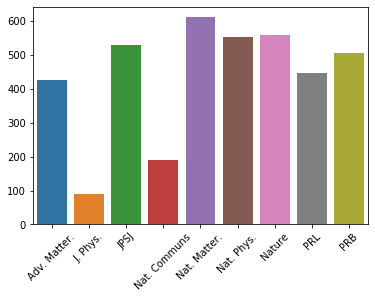

In [107]:
sns.barplot(journal, word_count)
plt.xticks(rotation=45)
plt.show()

文字数が 300 以下の場合にはもう１ページ読み込むほうが良いかも知れない

In [108]:
def loadtxt(pdf: str) -> str:
    output_string = StringIO()
    with open(pdf, 'rb') as in_file:
        parser = PDFParser(in_file)
        doc = PDFDocument(parser)
        rsrcmgr = PDFResourceManager()
        device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        
        text = ""
        for page in PDFPage.create_pages(doc):
            interpreter.process_page(page)
            text = " ".join([text, output_string.getvalue()])
            if len(text.split()) > 300: break
    
    return text

In [109]:
adv_matter = clean(loadtxt("./Samples/AdvMatter1.pdf"))
jphys = clean(loadtxt("./Samples/JPhys1.pdf"))
jpsj = clean(loadtxt("./Samples/JPSJ1.pdf"))
nat_com = clean(loadtxt("./Samples/NatCommun1.pdf"))
nat_mat = clean(loadtxt("./Samples/NatMatter1.pdf"))
nat_phys = clean(loadtxt("./Samples/NatPhys1.pdf"))
nat = clean(loadtxt("./Samples/Nature1.pdf"))
prl = clean(loadtxt("./Samples/PRL1.pdf"))
prb = clean(loadtxt("./Samples/PRB1.pdf"))

In [110]:
jphys

'journal physics condensed matterfast track communicationthe giant anomalous hall effect ferromagnetfe3sn2—a frustrated kagome metalto cite article kida et al 2011 phys condens matter 23 112205 view article online updates enhancementsrelated contentnon-collinearity spin frustration theitinerant kagome ferromagnet fe3sn2l fenner dee wills-anomalous hall effect electrontransport ferromagnetic mnbi filmsp kharel sellmyer-skew scattering dominated anomaloushall effect coxmgo100x granular thinfilmsqiang zhang yan wen yuelei zhao et al-recent citationselemental analysis magnetism ofhydronium jarosites—model kagomeantiferromagnets topological spinglassesa wills bisson-anomalous hall effect due tononcollinearity pyrochlore compoundsrole orbital aharonov-bohm effecttomizawa takeshi kontani hirhoshi-this content downloaded ip address 1578219415 09102019 0406 journal physics condensed matterfast track communicationthe giant anomalous hall effect ferromagnetfe3sn2—a frustrated kagome metalto cite 

In [111]:
nat_com

'article httpsdoiorg101038s41467-019-13968-8 open topological magneto-optical effects quantization noncoplanar antiferromagnets xiaodong zhou1 guang-yu guo4 stefan blügel jan-philipp hanke wanxiang feng yuriy mokrousov yugui yao1 reﬂecting fundamental interactions polarized light magnetic matter magnetooptical effects well known since century emergence phenomena commonly attributed interplay exchange splitting spin-orbit coupling electronic structure magnets using theoretical arguments demonstrate topological magneto-optical effects arise noncoplanar antiferromagnets due ﬁnite scalar spin chirality without reference exchange splitting spin-orbit coupling propose spectral integrals certain magneto-optical quantities uncover unique topological nature discovered effect also ﬁnd kerr faraday rotation angles quantized insulating topological antiferromagnets low-frequency limit owing nontrivial global properties manifest quantum topological magneto-optical effects although predicted topologi

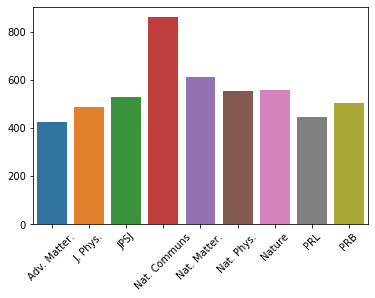

In [112]:
journal = ["Adv. Matter.", "J. Phys.", "JPSJ", "Nat. Communs", "Nat. Matter.", "Nat. Phys.", "Nature", "PRL", "PRB"]
word_count = [
    len(adv_matter.split()), len(jphys.split()), len(jpsj.split()), len(nat_com.split()), len(nat_mat.split()),
    len(nat_phys.split()), len(nat.split()), len(prl.split()), len(prb.split()),
]

sns.barplot(journal, word_count)
plt.xticks(rotation=45)
plt.show()

In [113]:
whole = " ".join([adv_matter, jphys, jpsj, nat_com, nat_mat, nat_phys, nat, prl, prb])

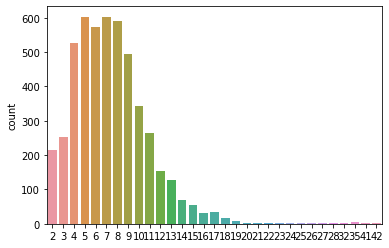

In [114]:
word_lengths = [len(word) for word in whole.split()]

sns.countplot(word_lengths)
plt.show()

In [115]:
long_words = [word for word in whole.split() if len(word) > 18]

In [116]:
long_words

['wenhongwang@iphyaccn',
 '101002adma201701144',
 'dzyaloshinskii–moriya',
 'communicationwwwadvmatde',
 'ferromagnetfe3sn2—a',
 'enhancementsrelated',
 'contentnon-collinearity',
 'kagomeantiferromagnets',
 'ferromagnetfe3sn2—a',
 'enhancementsrelated',
 'contentnon-collinearity',
 'kagomeantiferromagnets',
 'doi1010880953-89842311112205',
 'stacksioporgjphyscm23112205',
 '0953-898411112205+06$3300',
 'httpsdoiorg101038s41467-019-13968-8',
 'httpsdoiorg101038s41467-019-13968-8',
 'wwwnaturecomnaturecommunications',
 'httpsdoiorg101038s41467-019-13968-8',
 'httpsdoiorg101038s41467-019-13968-8',
 'wwwnaturecomnaturecommunications',
 'httpsdoiorg101038s41467-019-13968-8',
 'face-centered-cubic',
 'httpsdoiorg101038s41467-019-13968-8',
 'wwwnaturecomnaturecommunications',
 'wwwnaturecomnaturematerials',
 'articleshttpsdoiorg101038s41563-019-0531-0',
 'wwwnaturecomnaturephysics',
 'lettershttpsdoiorg101038s41567-019-0487-7',
 'doi101038nature13763',
 'superconductivity16',
 '101103physrevl

単語の長さが長いものには重要そうなものは少ない。特に電話番号のようなものやURLのようなものは正規表現ですぐに消せそう

In [139]:
SPACES = r"\n+|,|\s+"
QUOTES = r"(\[|\()\d+((–|,|\s)\d+)?(\]|\))"
SPLITTERS = r"\.|:|'|’|/|;|\*"
WRAPPED = r"\-\s"
MULTIPLE_SPACES = r"\s+"
PARANCES = r"(\(|\[)|(\)|\])"
PHONES = r"(\d|\-|=)+"
URLS = r"(www|http).+"
MAILS = r".[^\s]+@[^\s]+"

def clean(text: str) -> str:
    text = re.sub(SPACES, " ", text.lower())
    text = re.sub(QUOTES, "", text)
    text = re.sub(SPLITTERS, "", text)
    text = re.sub(WRAPPED, "", text)
    text = re.sub(PARANCES, "", text)
    text = re.sub(PHONES, "", text)
    text = re.sub(URLS, "", text)
    text = re.sub(MAILS, "", text)
    text = re.sub(MULTIPLE_SPACES, " ", text)
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stopwords.words("english") and len(word) > 1]
    
    return " ".join(text_list2)

In [140]:
adv_matter = clean(loadtxt("./Samples/AdvMatter1.pdf"))
jphys = clean(loadtxt("./Samples/JPhys1.pdf"))
jpsj = clean(loadtxt("./Samples/JPSJ1.pdf"))
nat_com = clean(loadtxt("./Samples/NatCommun1.pdf"))
nat_mat = clean(loadtxt("./Samples/NatMatter1.pdf"))
nat_phys = clean(loadtxt("./Samples/NatPhys1.pdf"))
nat = clean(loadtxt("./Samples/Nature1.pdf"))
prl = clean(loadtxt("./Samples/PRL1.pdf"))
prb = clean(loadtxt("./Samples/PRB1.pdf"))

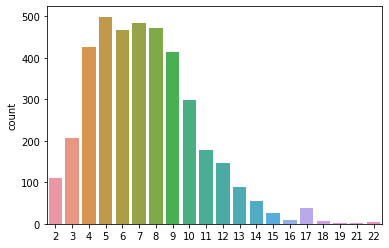

In [141]:
whole = " ".join([adv_matter, jphys, jpsj, nat_com, nat_mat, nat_phys, nat, prl, prb])
word_lengths = [len(word) for word in whole.split()]

sns.countplot(word_lengths)
plt.show()

In [142]:
long_words = [word for word in whole.split() if len(word) > 18]
long_words

['dzyaloshinskii–moriya',
 'enhancementsrelated',
 'contentnoncollinearity',
 'kagomeantiferromagnets',
 'enhancementsrelated',
 'contentnoncollinearity',
 'kagomeantiferromagnets',
 'stacksioporgjphyscm']

In [147]:
short_words = [word for word in whole.split() if len(word) < 3]

In [148]:
short_words

['xu',
 'xu',
 'wu',
 'mn',
 'dr',
 'dr',
 'dr',
 'dr',
 'dr',
 'wu',
 'dr',
 'dr',
 'et',
 'al',
 'rt',
 'mn',
 'rt',
 'dr',
 'xu',
 'xu',
 'dr',
 'co',
 'et',
 'al',
 'et',
 'ip',
 'et',
 'al',
 'et',
 'ip',
 'pp',
 'aj',
 'uk',
 'ah',
 'uk',
 'tc',
 'tf',
 'cm',
 'μ\x01',
 'cm',
 'fe',
 'ni',
 'rs',
 'fe',
 'rs',
 'xx',
 'fe',
 'ni',
 '+$',
 'uk',
 'pp',
 'k\x1b',
 'ðþ',
 'km',
 '\x1b\x01',
 '\x0ff',
 '\x0ff',
 'sx',
 'ðþ',
 'sk',
 'kk',
 'ye',
 'de',
 'mn',
 'fe',
 'co',
 'sn',
 'ge',
 'mn',
 'ca',
 'nm',
 'fl',
 'ii',
 'ny',
 'tu',
 'ye',
 'du',
 'nm',
 'nm',
 'μh',
 'hω',
 'sr',
 'sz',
 'sz',
 'sr',
 'uk',
 'mr',
 'mr',
 'rh',
 'rr',
 'rh',
 'mr',
 'mh',
 'te',
 'us',
 'ab',
 'iℏ',
 'ðþ',
 'xþ',
 'pþ',
 'ð−',
 'de',
 'de',
 'nm',
 'mn',
 'bz',
 'ie',
 'bz',
 'bz',
 'bz']

2文字の単語には意味があるものが少ない印象。重要な可能性があるのは元素記号ぐらいか？

In [159]:
NOT_ALPHA = r"[^a-zA-Z\s]"
SPACES = r"\n+|,|\s+"
QUOTES = r"(\[|\()\d+((–|,|\s)\d+)?(\]|\))"
SPLITTERS = r"\.|:|'|’|/|;|\*"
WRAPPED = r"\-\s"
MULTIPLE_SPACES = r"\s+"
PARANCES = r"(\(|\[)|(\)|\])"
PHONES = r"(\d|\-|=)+"
URLS = r"(www|http).+"
MAILS = r".[^\s]+@[^\s]+"

def clean(text: str) -> str:
    text = re.sub(NOT_ALPHA, "", text.lower())
    text = re.sub(SPACES, " ", text)
    text = re.sub(QUOTES, "", text)
    text = re.sub(SPLITTERS, "", text)
    text = re.sub(WRAPPED, "", text)
    text = re.sub(PARANCES, "", text)
    text = re.sub(PHONES, "", text)
    text = re.sub(URLS, "", text)
    text = re.sub(MAILS, "", text)
    text = re.sub(MULTIPLE_SPACES, " ", text)
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stopwords.words("english") and len(word) > 2]
    
    return " ".join(text_list2)

In [160]:
adv_matter = clean(loadtxt("./Samples/AdvMatter1.pdf"))
jphys = clean(loadtxt("./Samples/JPhys1.pdf"))
jpsj = clean(loadtxt("./Samples/JPSJ1.pdf"))
nat_com = clean(loadtxt("./Samples/NatCommun1.pdf"))
nat_mat = clean(loadtxt("./Samples/NatMatter1.pdf"))
nat_phys = clean(loadtxt("./Samples/NatPhys1.pdf"))
nat = clean(loadtxt("./Samples/Nature1.pdf"))
prl = clean(loadtxt("./Samples/PRL1.pdf"))
prb = clean(loadtxt("./Samples/PRB1.pdf"))

In [165]:
adv_matter

'magnetic skyrmions observation various spontaneous magnetic skyrmionic bubbles room temperature frustrated kagome magnet uniaxial magnetic anisotropy zhipeng hou weijun ren bei ding guizhou yue wang bing yang qiang zhang ying zhang enke liu feng wenhong wang guangheng xixiang zhang baogen shen zhidong zhang quest materials hosting topologically protected skyrmionic spin tex tures continues fueled promise novel devices although many materials demonstrated existence spin textures major chal lenges remain addressed devices based magnetic skyrmions realized example able create manipulate skyrmionic spin textures room temperature great importance techno logical applications adapt various external stimuli acting information carriers spintronic devices first observation skyrmionic magnetic bubbles variable topological spin textures formed room temperature frustrated kagome fesn magnet uniaxial magnetic anisotropy reported magnetization dynamics investi gated using situ lorentz transmission e

In [162]:
len(adv_matter.split())

408

tf-idf を使って各文書の重要語を抜き出してみる

In [170]:
from typing import List, Dict
from collections import defaultdict
import numpy as np

def tf_idf(docs: List[List[str]], index: int) -> Dict[str, float]:
    D = len(docs)
    num_words = len(docs[index])
    
    tf = defaultdict(float)
    for word in docs[index]:
        tf[word] += 1
            
    for word in tf.keys():
        tf[word] /= num_words
        
    idf = defaultdict(float)
    for word in tf.keys():
        num_docs_has_word = 0
        for doc in docs:
            for w in doc:
                if w == word:
                    num_docs_has_word += 1
                    break
        idf[word] = np.log(D / (1 + num_docs_has_word))
        
    result = dict()
    for word in tf.keys():
        result[word] = tf[word] * idf[word]
        
    return result

In [171]:
data = [
    adv_matter.split(), jphys.split(), jpsj.split(), nat_mat.split(),
    nat_com.split(), nat_phys.split(), nat.split(), prl.split(), prb.split(),
]

In [172]:
adv_matter_tfidf = tf_idf(data, 0)

In [176]:
th = 0.015

for (key, value) in adv_matter_tfidf.items():
    if value > th:
        print(f"{key}: {value}")

skyrmions: 0.015900592474829976
skyrmionic: 0.016156063068648672
zhang: 0.021541417424864897
devices: 0.018848740246756788
textures: 0.021541417424864897
prof: 0.022118785246709915


In [182]:
adv_matter_tfidf_list = [[key, val] for (key, val) in adv_matter_tfidf.items()]
adv_matter_tfidf_list.sort(key=lambda x: x[1], reverse=True)

In [183]:
adv_matter_tfidf_list[:10]

[['prof', 0.022118785246709915],
 ['zhang', 0.021541417424864897],
 ['textures', 0.021541417424864897],
 ['devices', 0.018848740246756788],
 ['skyrmionic', 0.016156063068648672],
 ['skyrmions', 0.015900592474829976],
 ['bubbles', 0.014745856831139943],
 ['wang', 0.014745856831139943],
 ['room', 0.011925444356122483],
 ['magnet', 0.011059392623354957]]

In [184]:
nat_tfidf = [[key, val] for (key, val) in tf_idf(data, 6).items()]
nat_tfidf.sort(key=lambda x: x[1], reverse=True)

In [185]:
nat_tfidf[:10]

[['wte', 0.04338684798393099],
 ['magnetoresistance', 0.04049439145166892],
 ['large', 0.026032108790358593],
 ['extremely', 0.01446228266131033],
 ['positive', 0.01446228266131033],
 ['layered', 0.01446228266131033],
 ['layers', 0.012676295638478191],
 ['dichalcogenide', 0.011569826129048263],
 ['chains', 0.011569826129048263],
 ['xmr', 0.011569826129048263]]

In [186]:
nat_phys_tfidf = [[key, val] for (key, val) in tf_idf(data, 5).items()]
nat_phys_tfidf.sort(key=lambda x: x[1], reverse=True)

In [187]:
nat_phys_tfidf[:10]

[['beam', 0.03856608709682754],
 ['vortex', 0.024792484562246277],
 ['electromagnetic', 0.022037764055330023],
 ['evanescent', 0.022037764055330023],
 ['vector', 0.02012110418806062],
 ['optical', 0.01928304354841377],
 ['sam', 0.01928304354841377],
 ['photonic', 0.016096883350448496],
 ['spin', 0.015594811850314015],
 ['local', 0.014852201762203825]]

結構うまく行っていそうに見える